In [ ]:
import pandas as pd # Assuming you'll use Pandas for data manipulation
import os # For handling file paths
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt  # Import Matplotlib



data_folder = "sample_data"
file_name = "age_prediction.csv" # Replace with the actual file name
file_path = os.path.join(data_folder, file_name)


df = pd.read_csv(file_path) # Assuming it's a CSV file


print("First 5 records:", df.head())


First 5 records:       ID Age_group  Age  Gender  PAQ605  Body Mass Index  \
0  73564     Adult   61       2       2             35.7   
1  73568     Adult   26       2       2             20.3   
2  73576     Adult   16       1       2             23.2   
3  73577     Adult   32       1       2             28.9   
4  73580     Adult   38       2       1             35.9   

   Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
0                          110                2                150   
1                           89                2                 80   
2                           89                2                 68   
3                          104                2                 84   
4                          103                2                 81   

   Blood Insulin Levels  
0                 14.91  
1                  3.85  
2                  6.14  
3                 16.15  
4                 10.92  


In [ ]:
X = df[['Blood Glucose after fasting', 'Blood Insulin Levels', 'Body Mass Index']]  # Replace with your actual feature columns
y = df['Age_group']  # Replace with your actual target variable column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Feature Selection: Univariant


In [ ]:
# Apply SelectKBest with chi2
from sklearn.feature_selection import chi2 # Import chi2
from sklearn.feature_selection import SelectKBest # Import SelectKBest

select_k_best = SelectKBest(score_func=chi2, k=2)

X_train_k_best = select_k_best.fit_transform(X_train,y_train)
print("Selected features:",X_train.columns[select_k_best.get_support()])
print("Selected features:",X_train_k_best)


Selected features: Index(['Blood Glucose after fasting', 'Blood Insulin Levels'], dtype='object')
Selected features: [[ 97.    13.64]
 [ 96.    26.39]
 [ 96.    27.56]
 ...
 [120.    17.92]
 [ 97.     3.21]
 [ 83.    21.85]]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Recursive Feature Elimination
# Apply RFE with logistic regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)
X_train_rfe = rfe.fit_transform(X_train, y_train)
print("Selected features:",X_train.columns[rfe.get_support()])
print("Selected features:",X_train_rfe)


Selected features: Index(['Blood Glucose after fasting', 'Blood Insulin Levels'], dtype='object')
Selected features: [[ 97.    13.64]
 [ 96.    26.39]
 [ 96.    27.56]
 ...
 [120.    17.92]
 [ 97.     3.21]
 [ 83.    21.85]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train random forest and get feature importances
model = RandomForestClassifier()
model.fit(X_train, y_train)
importances = model.feature_importances_
# Display feature importances
feature_importances = pd.Series(importances,
index=X_train.columns)
print(feature_importances.sort_values(ascending=False))

Blood Insulin Levels           0.393699
Body Mass Index                0.340679
Blood Glucose after fasting    0.265622
dtype: float64


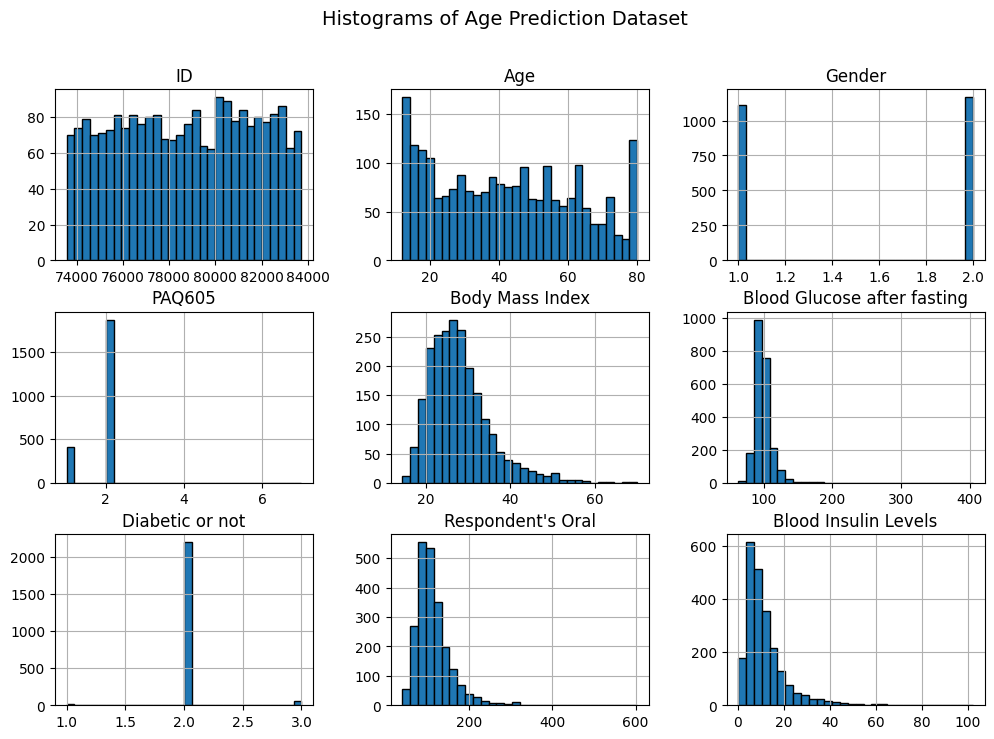

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of Age Prediction Dataset", fontsize=14)
plt.show()


In [ ]:
percent_missing = round (100*( df . isnull ().sum ())/len( df ),2)
percent_missing


,0
ID,0.0
Age_group,0.0
Age,0.0
Gender,0.0
PAQ605,0.0
Body Mass Index,0.0
Blood Glucose after fasting,0.0
Diabetic or not,0.0
Respondent's Oral,0.0
Blood Insulin Levels,0.0


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (if necessary)
penguins = df.dropna()


ID                             0
Age_group                      0
Age                            0
Gender                         0
PAQ605                         0
Body Mass Index                0
Blood Glucose after fasting    0
Diabetic or not                0
Respondent's Oral              0
Blood Insulin Levels           0
dtype: int64


In [ ]:
# prompt: pull .data and .column from df  which data from df = pd.read_csv(file_path)
import pandas as pd
df_pandas = pd.DataFrame(df)
data = df_pandas.values
column = df_pandas.columns
my_df = pd.DataFrame(data=data, columns=column)

my_df

,ID,Age_group,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,Adult,61,2,2,35.7,110,2,150,14.91
1,73568,Adult,26,2,2,20.3,89,2,80,3.85
2,73576,Adult,16,1,2,23.2,89,2,68,6.14
3,73577,Adult,32,1,2,28.9,104,2,84,16.15
4,73580,Adult,38,2,1,35.9,103,2,81,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711,Adult,38,2,2,33.5,100,2,73,6.53
2274,83712,Adult,61,1,2,30.0,93,2,208,13.02
2275,83713,Adult,34,1,2,23.7,103,2,124,21.41
2276,83718,Adult,60,2,2,27.4,90,2,108,4.99


In [ ]:
cleaned_data = df.drop (['Age_group'], axis =1)
cleaned_data . info ()

# columns_to_drop = [col for col in my_df.columns if col == 'Age_group']
# cleaned_data = my_df.drop(columns=columns_to_drop, axis=1)
# cleaned_data . info ()

cleaned_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2278 non-null   int64  
 1   Age                          2278 non-null   int64  
 2   Gender                       2278 non-null   int64  
 3   PAQ605                       2278 non-null   int64  
 4   Body Mass Index              2278 non-null   float64
 5   Blood Glucose after fasting  2278 non-null   int64  
 6   Diabetic or not              2278 non-null   int64  
 7   Respondent's Oral            2278 non-null   int64  
 8   Blood Insulin Levels         2278 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 160.3 KB


,ID,Age,Gender,PAQ605,Body Mass Index,Blood Glucose after fasting,Diabetic or not,Respondent's Oral,Blood Insulin Levels
0,73564,61,2,2,35.7,110,2,150,14.91
1,73568,26,2,2,20.3,89,2,80,3.85
2,73576,16,1,2,23.2,89,2,68,6.14
3,73577,32,1,2,28.9,104,2,84,16.15
4,73580,38,2,1,35.9,103,2,81,10.92
...,...,...,...,...,...,...,...,...,...
2273,83711,38,2,2,33.5,100,2,73,6.53
2274,83712,61,1,2,30.0,93,2,208,13.02
2275,83713,34,1,2,23.7,103,2,124,21.41
2276,83718,60,2,2,27.4,90,2,108,4.99


# Data Correlation

NameError: name 'cleaned_data' is not defined

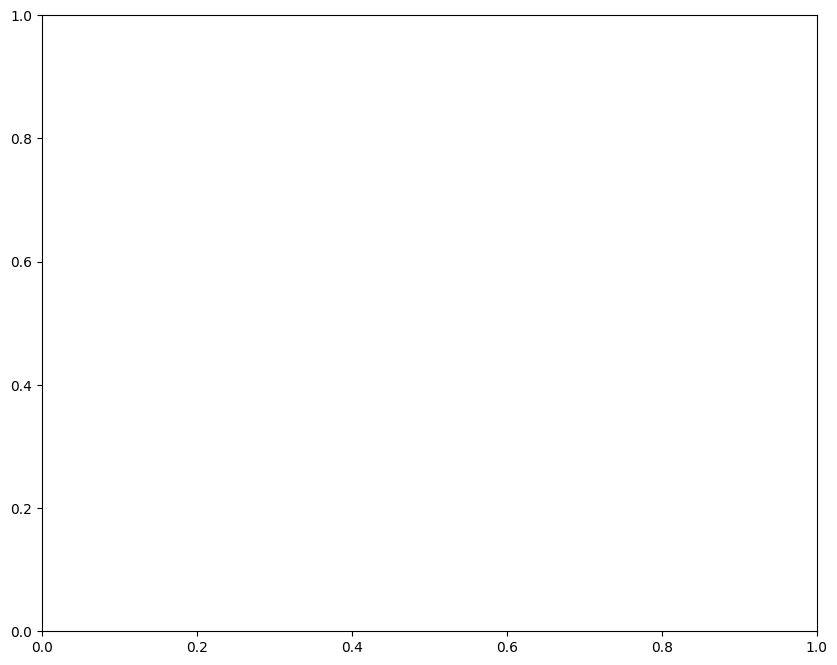

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the dataset into a pandas DataFrame

# Compute the correlation matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = cleaned_data.corr(method="pearson")  # Calculate correlations between features

# Plot the heatmap
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()


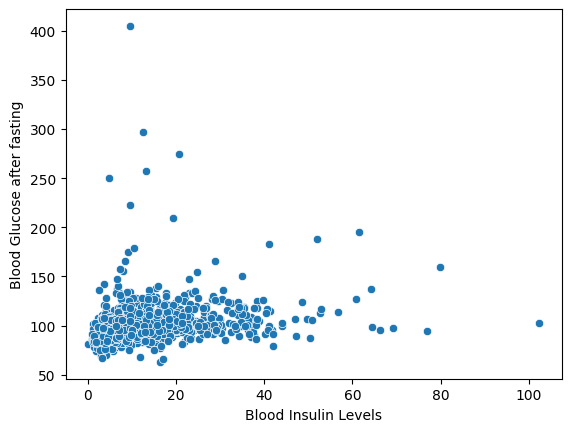

In [ ]:
# 3. ตรวจสอบ Outliers ที่อาจมีผลต่อค่า Correlation
#  ถ้ากระจายเป็นเส้นตรง → Pearson น่าจะถูกต้อง (0.78)
#  ถ้าเป็นแนวโค้ง หรือกระจายแบบไม่มีรูปแบบ → Spearman น่าจะถูกต้องกว่า (0.21)
sns.scatterplot(x=X_train["Blood Insulin Levels"], y=df["Blood Glucose after fasting"])
plt.show()

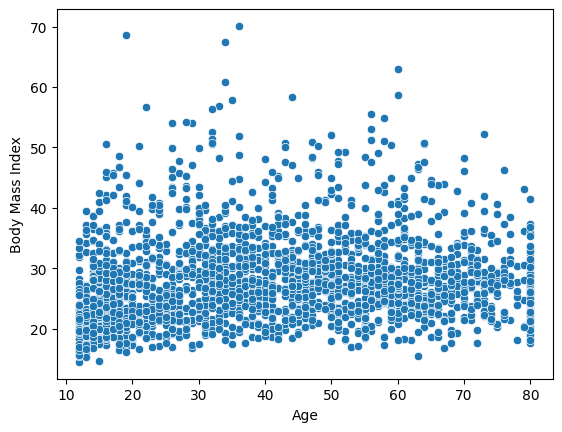

In [ ]:

sns.scatterplot(x=df["Age"], y=df["Body Mass Index"])
plt.show()

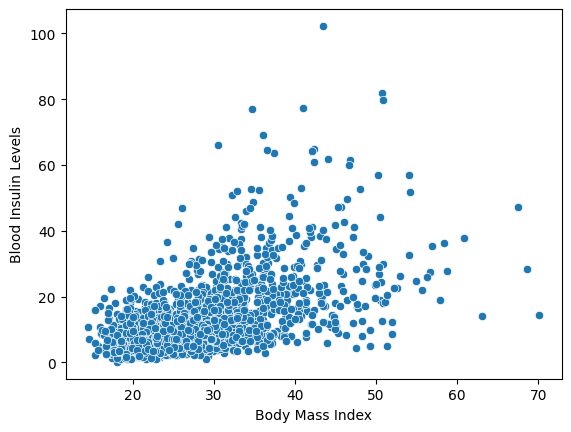

In [ ]:
sns.scatterplot(x=df["Body Mass Index"], y=df["Blood Insulin Levels"])
plt.show()

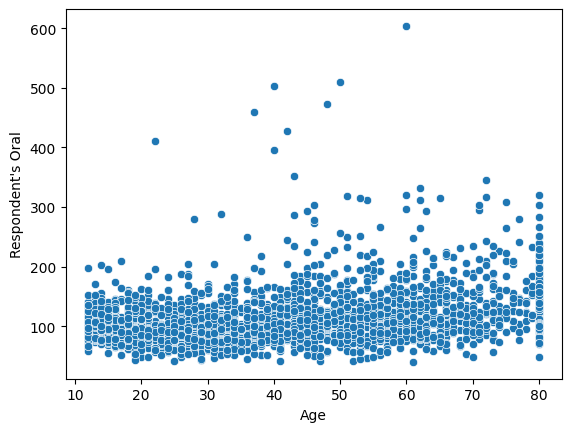

In [ ]:
sns.scatterplot(x=df["Age"], y=df["Respondent's Oral"])
plt.show()

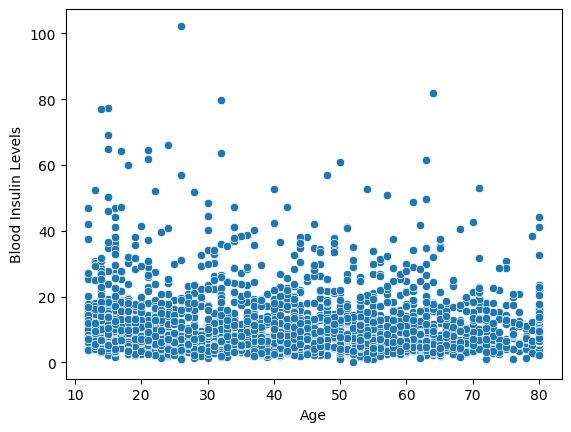

In [ ]:
sns.scatterplot(x=df["Age"], y=df["Blood Insulin Levels"])
plt.show()

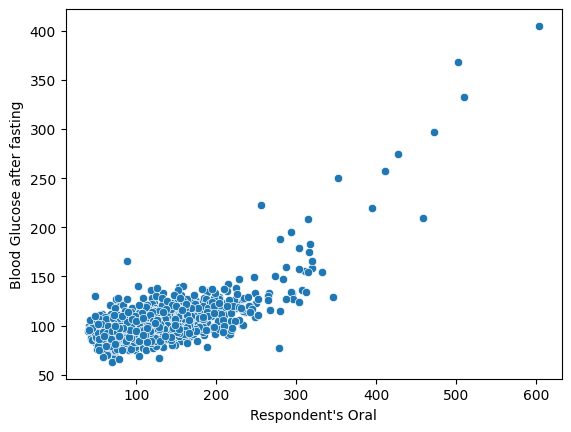

In [ ]:
sns.scatterplot(x=df["Respondent's Oral"], y=df["Blood Glucose after fasting"])
plt.show()

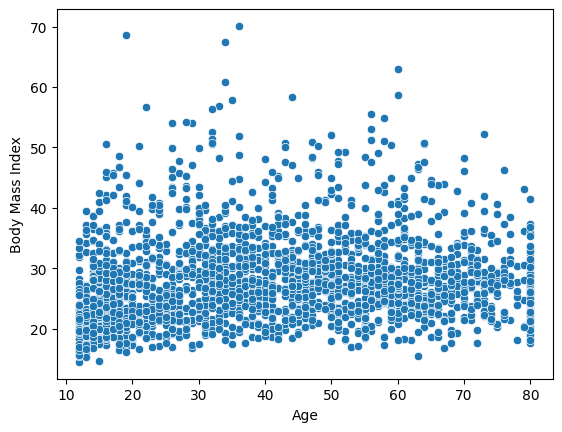

In [ ]:
sns.scatterplot(x=df["Age"], y=df["Body Mass Index"])
plt.show()

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Select relevant numerical features for clustering
features = [ "Body Mass Index", "Blood Insulin Levels"]
X = df[features]

# Standardize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

print(X_scaled_df.head())


   Body Mass Index  Blood Insulin Levels
0         1.068639              0.316487
1        -1.056270             -0.821762
2        -0.656125             -0.586084
3         0.130367              0.444103
4         1.096235             -0.094147


# Normalization/Standardize


In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

# Select relevant numerical features for clustering
features = [ 'Blood Glucose after fasting', 'Blood Insulin Levels' ]
X = df[features]

# 3. Initialize MinMaxScaler
scaler = MinMaxScaler()

# 4. Fit and transform the data
X_scaled = scaler.fit_transform(X)

# 5. Create a new DataFrame with scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)

# 6. Display the scaled data
print(X_scaled_df.head())

# Standardize
# from sklearn . preprocessing import StandardScaler
# data_scaler = StandardScaler ()
# X_scaled = data_scaler . fit_transform ( X_train_k_best )
# X_scaled.shape

   Blood Glucose after fasting  Blood Insulin Levels
0                     0.137427              0.144591
1                     0.076023              0.036319
2                     0.076023              0.058737
3                     0.119883              0.156730
4                     0.116959              0.105531


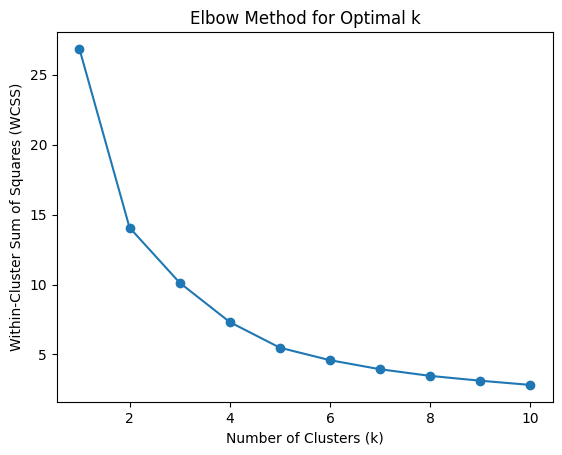

In [ ]:
# Import
from sklearn.cluster import KMeans

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()
# print(f"Elbow point (estimated): k = {elbow_point}")


# silhouette

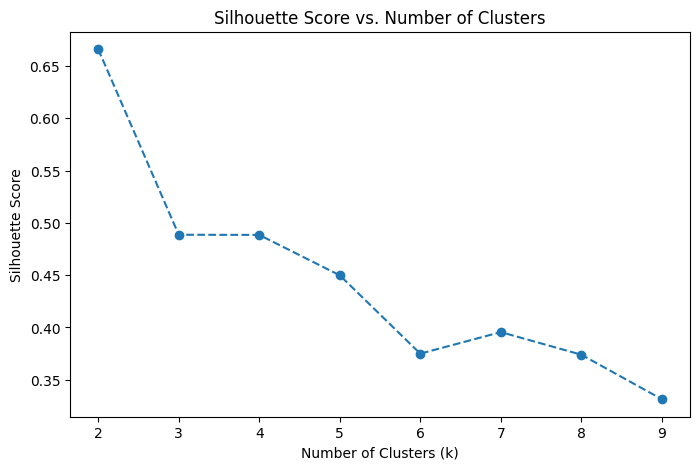

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

k_values = range(2, 10)
silhouette_scores = []

# Compute Silhouette Score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='dashed')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()

# Elbow Method

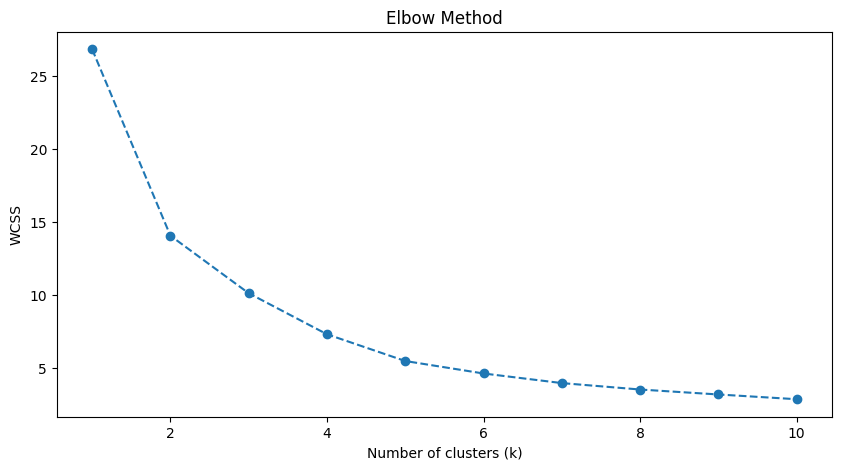

In [ ]:
# prompt: elbow method and elbow point
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Determine the elbow point (visually inspect the plot)
# In this example, the elbow point appears to be around k=3, but you might need to adjust this based on your data.
# elbow_point = 3  # This can be determined by visual inspection of the plot

# print(f"Elbow point (estimated): k = {elbow_point}")

# Kmean

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cleaned_data['Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters to the data

# View first few rows with cluster assignments
# print(cleaned_data.head())
centroids = kmeans.cluster_centers_
print("Cluster Centroids (Scaled):", centroids)

print(cleaned_data['Cluster'].value_counts())

print(cleaned_data.groupby('Cluster').mean())



Cluster Centroids (Scaled): [[0.14566314 0.31856087]
 [0.10184025 0.08796491]]
Cluster
1    2015
0     263
Name: count, dtype: int64
                   ID        Age    Gender    PAQ605  Body Mass Index  \
Cluster                                                                 
0        78472.433460  39.707224  1.505703  1.844106        37.182510   
1        78720.492804  42.068486  1.512159  1.819851        26.750819   

         Blood Glucose after fasting  Diabetic or not  Respondent's Oral  \
Cluster                                                                    
0                         112.768061         2.041825         147.140684   
1                          97.828288         2.012903         110.781141   

         Blood Insulin Levels  
Cluster                        
0                   32.637414  
1                    9.119613  


# **PCA**


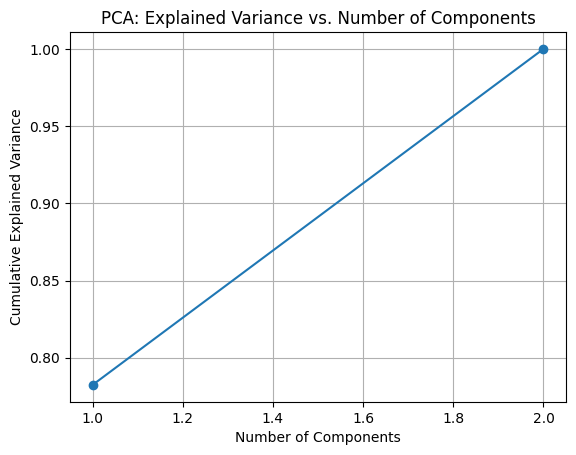

Optimal number of components for 95% variance: 2
PCA applied. Shape of transformed data: (2278, 2)


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

train_X = X_scaled
# 1. Initialize PCA
pca = PCA()

# 2. Fit PCA to your training data
pca.fit(train_X)

# 3. Determine the optimal number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

# Choose the number of components that explain a desired amount of variance (e.g., 95%)
desired_variance = 0.95  # Adjust as needed
n_components = np.argmax(cumulative_variance >= desired_variance) + 1
print(f"Optimal number of components for {desired_variance*100:.0f}% variance: {n_components}")

# 4. Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(train_X)

print("PCA applied. Shape of transformed data:", X_pca.shape)

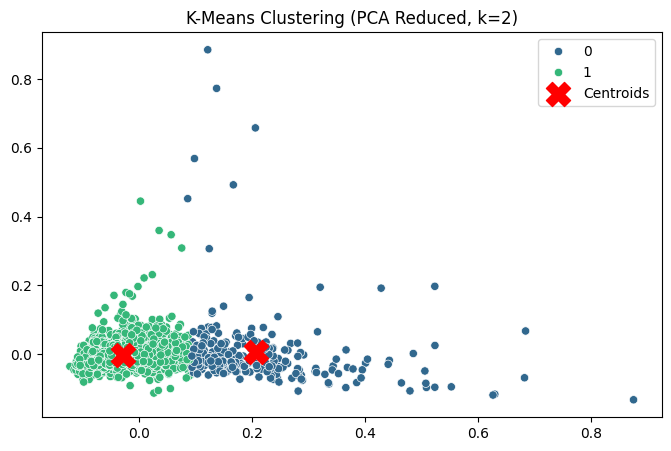

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# If data has only 2 numerical features
# plt.figure(figsize=(8, 5))
# sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cleaned_data['Cluster'], palette='viridis')
# plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
# plt.title("K-Means Clustering (k=3)")
# plt.legend()
# plt.show()
from sklearn.decomposition import PCA

# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cleaned_data['Cluster'], palette='viridis')
plt.scatter(pca.transform(centroids)[:, 0], pca.transform(centroids)[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (PCA Reduced, k=2)")
plt.legend()
plt.show()

# 4. Interpret the Clusters
# Look at cluster size, means, and characteristics.
# Check if cluster labels make sense (e.g., High, Medium, Low groups).
# Use the cluster labels for business decisions, anomaly detection, or feature engineering.

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_pca)
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score for k=2: {silhouette_avg}")

Silhouette Score for k=2: 0.6661440838370416


In [ ]:
import numpy as np
import matplotlib . pyplot as plt
import seaborn as sns
from scipy . cluster . hierarchy import dendrogram , linkage , fcluster

# Generate random data for demonstration
# np. random . seed (123 )
# data = np. random . rand (10 , 2)
# linked = linkage (data , 'single ')


# hierarchical

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant numerical features for clustering
features = ['Age',')']
hierarchical_X = df[features]

# 3. Initialize MinMaxScaler
scaler = MinMaxScaler()

# 4. Fit and transform the data
hierarchical_X_scaled = scaler.fit_transform(hierarchical_X)

# 5. Create a new DataFrame with scaled values
hierarchical_df = pd.DataFrame(hierarchical_X, columns = hierarchical_X.columns)

# 6. Display the scaled data
print(hierarchical_df.head())

   Age  Blood Glucose after fasting
0   61                          110
1   26                           89
2   16                           89
3   32                          104
4   38                          103


In [ ]:
from sklearn . preprocessing import StandardScaler

data_scaler = StandardScaler ()
scaled_data = data_scaler . fit_transform ( hierarchical_X )
scaled_data . shape
selected_feature_indices = select_k_best.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]
x_scaled_data= pd.DataFrame(hierarchical_X_scaled, columns = selected_feature_names)


In [ ]:
# pca = PCA(n_components=2)
# hierarchical_pca = pca.fit_transform(scaled_data)

In [ ]:
# Perform hierarchical clustering
complete_clustering = linkage(scaled_data, 'complete', metric ="euclidean")
single_clustering = linkage(scaled_data, 'single', metric ="euclidean")
average_clustering = linkage(scaled_data, 'average', metric ="euclidean")
# complete_clustering = linkage(X_scaled, 'complete', metric ="euclidean")
# single_clustering = linkage(X_scaled, 'single', metric ="euclidean")
# average_clustering = linkage(X_scaled, 'average', metric ="euclidean")

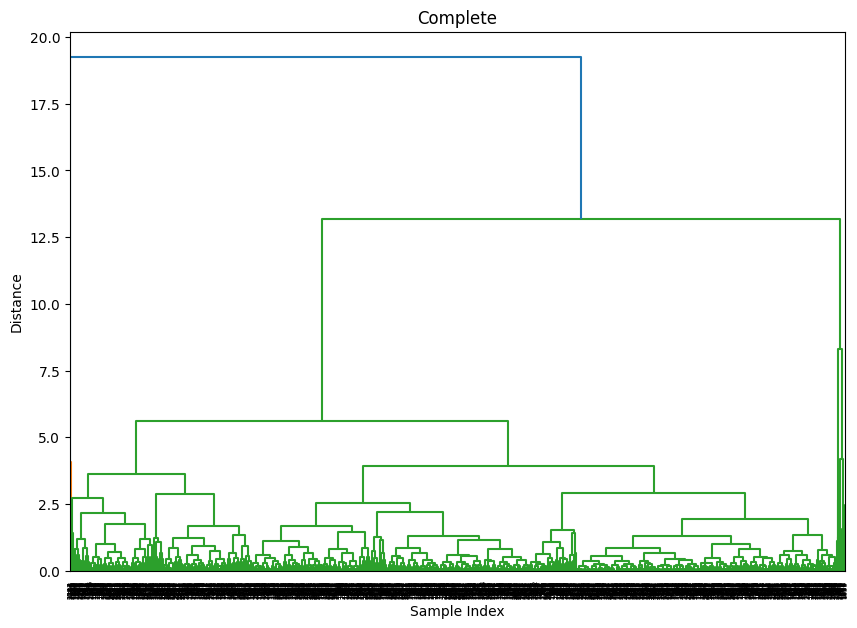

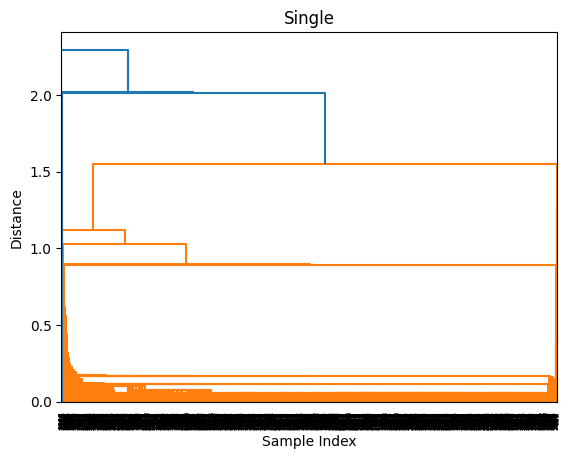

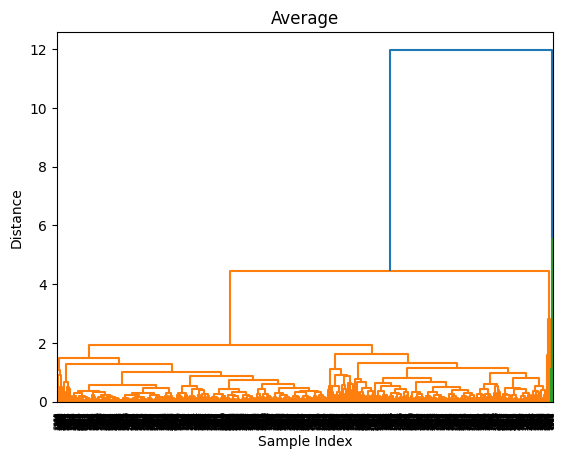

In [ ]:
num_rows = len(cleaned_data)  # Get the actual number of rows

plt . figure ( figsize =(10 , 7))
# dendrogram (linked,orientation ='top',labels = range (1, num_rows+1))

plt.title ('Complete')
plt.xlabel ('Sample Index')
plt.ylabel ('Distance')
dendrogram (complete_clustering)
plt.show ()
plt.title ('Single')
plt.xlabel ('Sample Index')
plt.ylabel ('Distance')
dendrogram (single_clustering )
plt.show ()
plt.title ('Average')
plt.xlabel ('Sample Index')
plt.ylabel ('Distance')
dendrogram (average_clustering )
plt.show ()



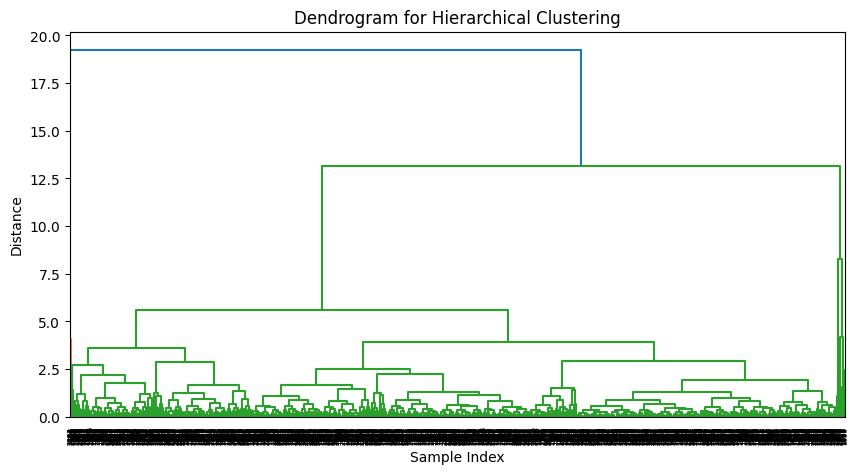

silhouette_scores: [0.8964021259558421]
silhouette_scores: [0.8964021259558421, 0.726162535686255]
silhouette_scores: [0.8964021259558421, 0.726162535686255, 0.6727786591930948]
silhouette_scores: [0.8964021259558421, 0.726162535686255, 0.6727786591930948, 0.30365230333359217]
silhouette_scores: [0.8964021259558421, 0.726162535686255, 0.6727786591930948, 0.30365230333359217, 0.2978832515915616]
silhouette_scores: [0.8964021259558421, 0.726162535686255, 0.6727786591930948, 0.30365230333359217, 0.2978832515915616, 0.29745586749684655]
silhouette_scores: [0.8964021259558421, 0.726162535686255, 0.6727786591930948, 0.30365230333359217, 0.2978832515915616, 0.29745586749684655, 0.3579515913740434]
silhouette_scores: [0.8964021259558421, 0.726162535686255, 0.6727786591930948, 0.30365230333359217, 0.2978832515915616, 0.29745586749684655, 0.3579515913740434, 0.33733950987777]


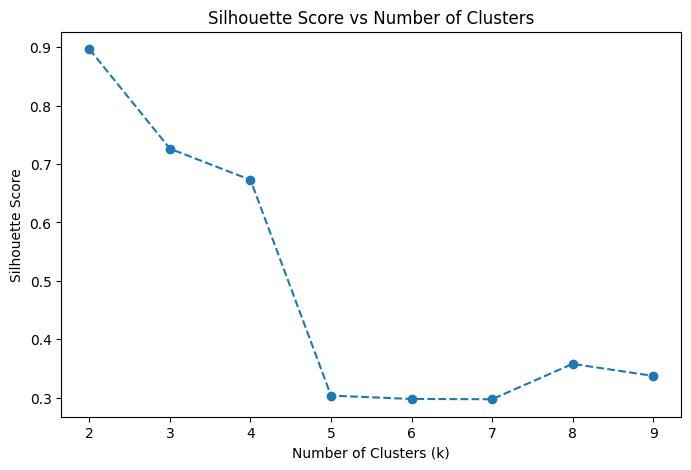

จำนวนคลัสเตอร์ที่เหมาะสมที่สุด: 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# สร้างตัวอย่างข้อมูล
from sklearn.datasets import make_blobs
# X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# วาด Dendrogram
plt.figure(figsize=(10, 5))
dendrogram(complete_clustering)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# ทดลองแบ่งกลุ่มโดยใช้ Agglomerative Clustering และคำนวณ Silhouette Score
silhouette_scores = []
K_range = range(2, 10)  # ทดลองจำนวนคลัสเตอร์ตั้งแต่ 2 ถึง 9

for k in K_range:
    clustering = AgglomerativeClustering(n_clusters=k, linkage="complete")
    labels = clustering.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)
    print(f"silhouette_scores: {silhouette_scores}")


# วาดกราฟ Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.show()

# ดูจำนวนกลุ่มที่ดีที่สุด
best_k = K_range[np.argmax(silhouette_scores)]
print(f"จำนวนคลัสเตอร์ที่เหมาะสมที่สุด: {best_k}")


In [ ]:
# สร้างโมเดล Hierarchical Clustering โดยกำหนดจำนวน cluster = 4
clustering = AgglomerativeClustering(n_clusters=2, linkage="complete")
pca = PCA(n_components=2)
hierarchical_pca = pca.fit_transform(scaled_data)
x_scaled_data["Cluster"] = clustering.fit_predict(hierarchical_pca)
x_scaled_data["Cluster"]

print(x_scaled_data["Cluster"].value_counts())
# # ดูค่าเฉลี่ยของแต่ละกลุ่ม
# print(df.groupby("Cluster").mean())


Cluster
0    2271
1       7
Name: count, dtype: int64


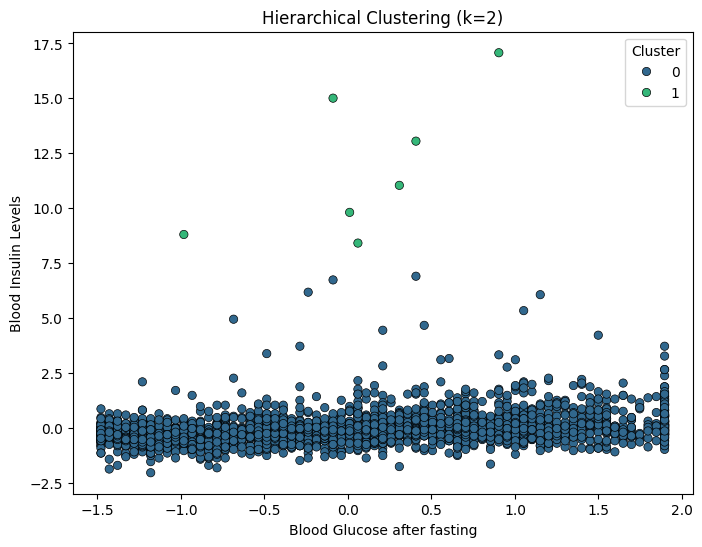

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=x_scaled_data["Cluster"], palette="viridis", edgecolor="k")
plt.title("Hierarchical Clustering (k=2)")
plt.xlabel("Blood Glucose after fasting")
plt.ylabel("Blood Insulin Levels")
plt.legend(title="Cluster")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering

# สร้างโมเดล Hierarchical Clustering
clustering = AgglomerativeClustering(n_clusters=2, linkage="complete")
labels = clustering.fit_predict(hierarchical_pca)  # ใช้ข้อมูลที่ normalize แล้ว


# คำนวณค่า Silhouette Score
silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")


Silhouette Score: 0.8720


# **Box blot**

In [ ]:
threshold = 1
cluster_assignments = fcluster ( complete_clustering , threshold , criterion='distance')
# cluster_assignments = fcluster ( single_clustering , threshold , criterion='distance')
# cluster_assignments = fcluster ( average_clustering , threshold , criterion='distance')
print(df['Age_group'])
# print(df['Cluster'])


0       Adult
1       Adult
2       Adult
3       Adult
4       Adult
        ...  
2273    Adult
2274    Adult
2275    Adult
2276    Adult
2277    Adult
Name: Age_group, Length: 2278, dtype: object


0       15
1       34
2       28
3       35
4       26
        ..
2273    26
2274    19
2275    35
2276    19
2277    35
Name: Cluster, Length: 2278, dtype: int32


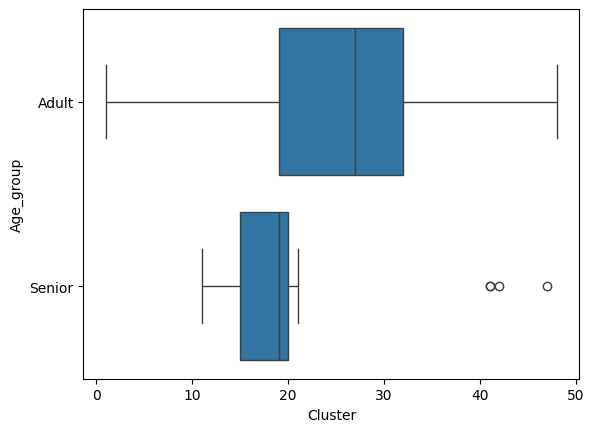

In [ ]:
import seaborn as sns # Import the Seaborn library
x_scaled_data['Cluster'] = cluster_assignments
sns . boxplot (x=x_scaled_data['Cluster'], y=df['Age_group'], data =df )

print(x_scaled_data['Cluster'])


In [ ]:
gender_mapping = {1: 'Man', 2: 'Woman'}
df['Gender'] = df['Gender'].map(gender_mapping)
filtered_df = df[df['Gender'].isin(['Man', 'Woman'])]  # Keep only rows with Gender 1 or 2
filtered_df['Gender']
df['Gender']
print(df['Gender'].unique())
print(df['Gender'])
# print(filtered_df['Gender'])


[nan]
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2273    NaN
2274    NaN
2275    NaN
2276    NaN
2277    NaN
Name: Gender, Length: 2278, dtype: object


<Axes: xlabel='Cluster', ylabel='Gender'>

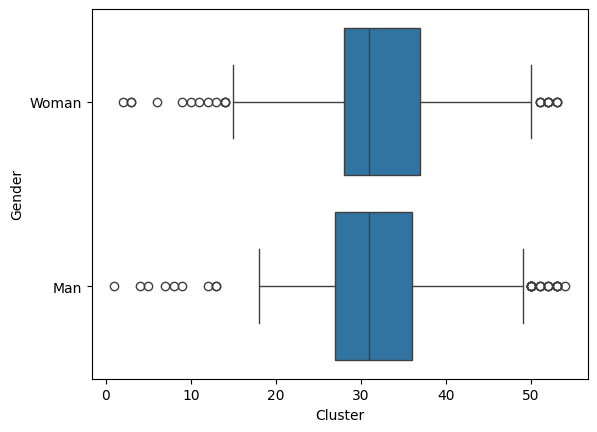

In [ ]:
import seaborn as sns # Import the Seaborn library

# 2. Replace values in the 'Gender' column

sns . boxplot (x=x_scaled_data['Cluster'], y=df['Gender'], data =df )

In [ ]:
diabetic_mapping = {1: 'yes', 2: 'no'}
df['diabetic'] = df['Diabetic or not'].map(diabetic_mapping)
filtered_df = df[df['diabetic'].isin([1, 2])]  # Keep only rows with Gender 1 or 2
filtered_df['diabetic']
df['diabetic']
print(df['diabetic'].unique())
print(df['diabetic'])
print(filtered_df['diabetic'])


['no' 'yes' nan]
0       no
1       no
2       no
3       no
4       no
        ..
2273    no
2274    no
2275    no
2276    no
2277    no
Name: diabetic, Length: 2278, dtype: object
Series([], Name: diabetic, dtype: object)


<Axes: xlabel='Diabetic or not'>

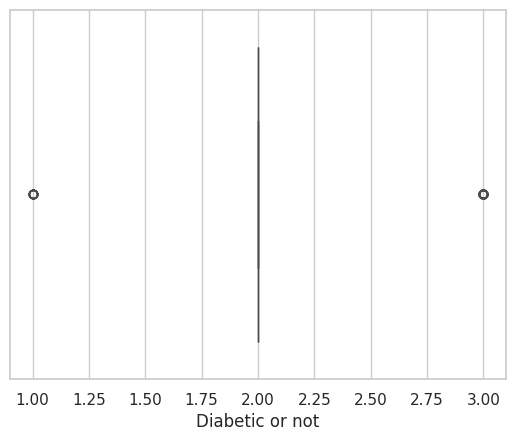

In [ ]:
import seaborn as sns # Import the Seaborn library

# 2. Replace values in the 'Gender' column

sns . boxplot (x=df['Diabetic or not'], y=filtered_df['diabetic'], data =df )

,Cluster
0,15
1,34
2,28
3,35
4,26
...,...
2273,26
2274,19
2275,35
2276,19


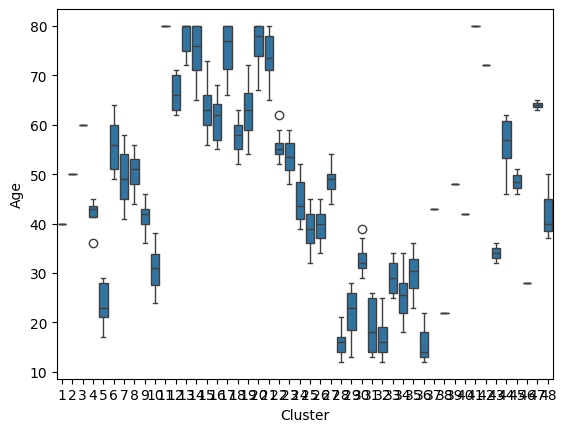

In [ ]:
import seaborn as sns # Import the Seaborn library

# 2. Replace values in the 'Gender' column

sns . boxplot (x=x_scaled_data['Cluster'], y=df['Age'], data =df )
x_scaled_data['Cluster']

In [ ]:
# Cut dendrogram to generate clusters
num_clusters = 2 # Choose the desired number of clusters
clusters = fcluster (complete_clustering , num_clusters ,criterion ='maxclust')
print (" Generated Clusters :", clusters )

In [ ]:
# Create a scatter plot to visualize cluster results
sns .set( style ="whitegrid")
plt . figure ( figsize =(8, 6))
plt . scatter ( data [:, 0], data [:, 1], c=clusters , cmap ='viridis', s=100)
plt . title ('Cluster Results')
plt . xlabel ('Feature 1')
plt . ylabel ('Feature 2')
plt . show ()

import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่า Style
sns.set(style="whitegrid")

# สร้างกราฟ
plt.figure(figsize=(8, 6))

# พล็อตข้อมูล (ปรับตัวแปร clusters ให้ตรงกับที่คุณสร้างไว้)
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=100)

# ตั้งชื่อกราฟและแกน
plt.title('Cluster Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# แสดงกราฟ
plt.show()

In [ ]:
dendrogram ( complete_clustering )
plt . show ()
# dendrogram ( average_clustering )
# plt . show ()
# dendrogram ( single_clustering )
# plt . show ()

In [ ]:
# # Perform clustering and obtain cluster assignments
# threshold = 10
# cluster_assignments = fcluster ( complete_clustering , threshold , criterion='distance ')

In [ ]:
# import seaborn as sns # Import the Seaborn library
# loan_data['Cluster'] = cluster_assignments
# sns . boxplot (x='Cluster ', y='fico ', data =loan_data )

## RI , Purity , entropy

In [ ]:
import numpy as np
from sklearn . metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# True labels and predicted clusters
true_labels = df["Age_group"].values  # Replace with actual categorical columnclusters = [0, 0, 1, 1, 1, 2, 2, 2, 0]
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(df["Age_group"])  # Convert to numeric labels
df["Cluster_Label"] = kmeans.fit_predict(X_pca)

# Compute confusion matrix
cm = confusion_matrix ( true_labels_encoded  , df["Cluster_Label"])
# Purity
purity = np.sum (np. amax (cm , axis =0)) / np.sum(cm)
print (f" Purity : { purity }")
# Entropy
def entropy ( cluster_counts ):
  total = np. sum( cluster_counts )
  proportions = cluster_counts / total
  return -np.sum( proportions * np. log2 ( proportions + np. finfo ( float ).eps))
cluster_entropies = np. apply_along_axis ( entropy , 1, cm)
weighted_entropy = np.sum( cluster_entropies * np.sum(cm , axis =1) / np.sum(cm))
print (f" Entropy : { weighted_entropy }")


In [ ]:
from sklearn . metrics import adjusted_rand_score , rand_score
# True clustering
# Predicted clustering
predicted_labels = cleaned_data['Cluster']
# Compute Rand Index (RI)
ri = rand_score ( true_labels , predicted_labels )
print (f" Rand Index (RI): {ri}")
# Compute Adjusted Rand Index (ARI)
ari = adjusted_rand_score ( true_labels ,predicted_labels )
print (f" Adjusted Rand Index ( ARI): {ari}")

Hierarchical RI,Purity, entrophy

In [ ]:
import numpy as np
from sklearn . metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# True labels and predicted clusters
true_labels = df["Age_group"].values  # Replace with actual categorical columnclusters = [0, 0, 1, 1, 1, 2, 2, 2, 0]
label_encoder = LabelEncoder()
true_labels_encoded = label_encoder.fit_transform(df["Age_group"])  # Convert to numeric labels

# Compute confusion matrix
cm = confusion_matrix ( true_labels_encoded  , cluster_assignments)
# Purity
purity = np.sum (np. amax (cm , axis =0)) / np.sum(cm)
print (f" Purity : { purity }")
# Entropy
def entropy ( cluster_counts ):
  total = np. sum( cluster_counts )
  proportions = cluster_counts / total
  return -np.sum( proportions * np. log2 ( proportions + np. finfo ( float ).eps))
cluster_entropies = np. apply_along_axis ( entropy , 1, cm)
weighted_entropy = np.sum( cluster_entropies * np.sum(cm , axis =1) / np.sum(cm))
print (f" Entropy : { weighted_entropy }")
